In [1]:
import matplotlib.pyplot as plt
import gensim
import pandas as pd
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
# LdaMallet was removed in gensim 4.0.0
from gensim.corpora import Dictionary

from gensim import corpora

import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Topic modeling

test all gensim topic modelin using gensim dataset or ur own dataset (ex: tweets)

In [18]:
def clean_text(text):

    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuations = text.translate(translator)
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    tokens = word_tokenize(text_without_punctuations)

    filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words("english")]

    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]

    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return stemmed_words

In [30]:
# Input from csv
df = pd.read_csv('voted-kaggle-dataset.csv')

df = df.dropna()

df.shape


(768, 15)

In [4]:
text_data = []

for i in range(len(df['Description'])):
    try:
        text_data.append(clean_text(df['Description'][i]))
    except:
        pass
text_data

[['dataset',
  'contain',
  'transact',
  'make',
  'credit',
  'card',
  'septemb',
  '2013',
  'european',
  'cardhold',
  'dataset',
  'present',
  'transact',
  'occur',
  'two',
  'day',
  '492',
  'fraud',
  '284807',
  'transact',
  'dataset',
  'highli',
  'unbal',
  'posit',
  'class',
  'fraud',
  'account',
  '0172',
  'transact',
  'contain',
  'numer',
  'input',
  'variabl',
  'result',
  'pca',
  'transform',
  'unfortun',
  'due',
  'confidenti',
  'issu',
  'provid',
  'origin',
  'featur',
  'background',
  'inform',
  'data',
  'featur',
  'v1',
  'v2',
  'v28',
  'princip',
  'compon',
  'obtain',
  'pca',
  'featur',
  'transform',
  'pca',
  'time',
  'amount',
  'featur',
  'time',
  'contain',
  'second',
  'elaps',
  'transact',
  'first',
  'transact',
  'dataset',
  'featur',
  'amount',
  'transact',
  'amount',
  'featur',
  'use',
  'exampledepend',
  'costsenst',
  'learn',
  'featur',
  'class',
  'respons',
  'variabl',
  'take',
  'valu',
  '1',
  'cas

In [5]:
import pickle

pickle.dump(text_data, open('topic/text_data2k.pkl', 'wb'))

In [12]:
text_data = pickle.load(open('topic/text_data2k.pkl', 'rb'))

# Create a dictionary
dictionary = corpora.Dictionary(text_data)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in text_data]

corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 3),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 3),
  (41, 5),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 7),
  (51, 1),
  (52, 4),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 3),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [7]:
# Train the LDA model
lda_model = LdaModel(corpus, id2word=dictionary)
Lsi_model = LsiModel(corpus, id2word=dictionary)
Hdp_model = HdpModel(corpus, id2word=dictionary)


In [21]:
pickle.dump(lda_model, open('topic/lda.pkl', 'wb'))
pickle.dump(Lsi_model, open('topic/lsi.pkl', 'wb'))
pickle.dump(Hdp_model, open('topic/hdp.pkl', 'wb'))

In [22]:
lda_model = pickle.load(open('topic/lda.pkl', 'rb'))
Lsi_model = pickle.load(open('topic/lsi.pkl', 'rb'))
Hdp_model = pickle.load(open('topic/hdp.pkl', 'rb'))

In [8]:
Ldacoher = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence='c_v').get_coherence()
Lsicoher = CoherenceModel(model=Lsi_model, texts=text_data, dictionary=dictionary, coherence='c_v').get_coherence()
hdpcoher = CoherenceModel(model=Hdp_model, texts=text_data, dictionary=dictionary, coherence='c_v').get_coherence()

In [24]:
pickle.dump(Ldacoher, open('topic/co-lda.pkl', 'wb'))
pickle.dump(Lsicoher, open('topic/co-lsi.pkl', 'wb'))
pickle.dump(hdpcoher, open('topic/co-hdp.pkl', 'wb'))

In [28]:
Ldacoher = pickle.load(open('topic/co-lda.pkl', 'rb'))
Lsicoher = pickle.load(open('topic/co-lsi.pkl', 'rb'))
hdpcoher = pickle.load(open('topic/co-hdp.pkl', 'rb'))

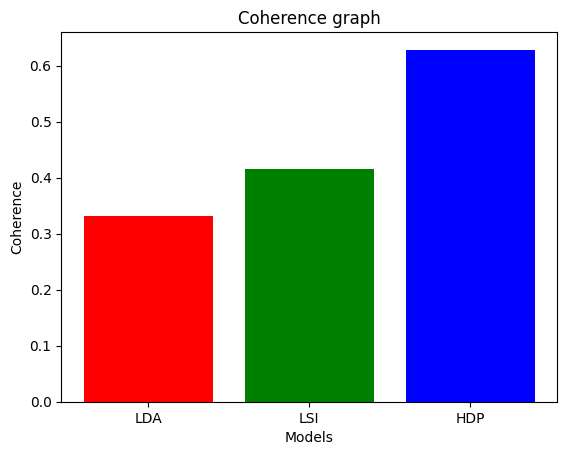

In [26]:
plt.bar(['LDA', 'LSI', 'HDP'], [Ldacoher, Lsicoher, hdpcoher],color=['red', 'green', 'blue'])
plt.title('Coherence graph')
plt.xlabel('Models')
plt.ylabel('Coherence')
plt.show()

In [32]:
topics = Hdp_model.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.010*data + 0.007*player + 0.007*dataset + 0.004*use + 0.004*team + 0.003*shoot + 0.003*imag + 0.003*take')
(1, '0.010*data + 0.006*dataset + 0.003*year + 0.003*use + 0.003*contain + 0.003*inform + 0.002*time + 0.002*includ')
(2, '0.010*data + 0.004*dataset + 0.003*use + 0.003*time + 0.003*state + 0.002*includ + 0.002*contain + 0.002*acknowledg')
(3, '0.004*dataset + 0.004*data + 0.004*race + 0.003*hors + 0.003*number + 0.003*use + 0.003*time + 0.002*contain')
(4, '0.008*data + 0.004*dataset + 0.003*includ + 0.002*use + 0.002*file + 0.002*gene + 0.002*imag + 0.002*state')
(5, '0.005*data + 0.003*dataset + 0.002*price + 0.002*locat + 0.002*use + 0.002*day + 0.002*bitcoin + 0.002*transact')
(6, '0.010*integ + 0.010*12345 + 0.009*strongli + 0.006*interest + 0.005*agre + 0.005*disagre + 0.005*enjoy + 0.002*dont')
(7, '0.004*data + 0.002*dataset + 0.002*job + 0.002*player + 0.002*frequenc + 0.001*attribut + 0.001*collect + 0.001*learn')
(8, '0.004*data + 0.003*dataset + 0.002*code + 0

In [31]:
topics = Lsi_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '-0.500*"integ" + -0.481*"12345" + -0.460*"strongli" + -0.265*"interest" + -0.228*"agre" + -0.228*"disagre"')
(1, '0.504*"player" + 0.328*"team" + 0.232*"goal" + 0.228*"faceoff" + 0.223*"shoot" + 0.209*"ice"')
(2, '0.497*"data" + 0.325*"dataset" + 0.218*"use" + 0.195*"’" + 0.173*"file" + 0.149*"contain"')
(3, '-0.871*"’" + -0.275*"student" + -0.122*"‘" + 0.118*"data" + -0.095*"educ" + 0.086*"dataset"')
(4, '-0.866*"numer" + -0.469*"text" + -0.050*"food" + -0.047*"open" + 0.044*"data" + -0.040*"product"')
(5, '0.589*"race" + 0.469*"hors" + 0.297*"section" + 0.223*"time" + 0.202*"take" + 0.196*"sec"')
(6, '0.565*"station" + 0.248*"file" + 0.246*"featur" + 0.242*"valu" + 0.220*"weather" + 0.151*"store"')
(7, '0.363*"fire" + -0.342*"dataset" + 0.247*"data" + 0.235*"unit" + 0.220*"state" + -0.205*"imag"')
(8, '0.543*"data" + -0.252*"fire" + -0.251*"dataset" + -0.211*"number" + -0.145*"mean" + -0.137*"per"')
(9, '-0.301*"number" + -0.276*"town" + -0.264*"mean" + -0.244*"salari" + -0.232*